# Preprocessing

In [24]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

In [25]:
# Load dataset
heart_dataset = pd.read_csv('heart_2020_cleaned.csv')

# Copy dataset for processing
heart_dataset_preprocessed = heart_dataset.copy()

# First look at data
print(heart_dataset.index)
heart_dataset.head()

RangeIndex(start=0, stop=319795, step=1)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [26]:
# More detailed look at data
display(heart_dataset.describe(include='all'))
heart_dataset.dtypes

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

**Conclusion:**

Numerical values: BMI, PhysicalHealth, MentalHealth and SleepTime

None numerical values: HeartDisease(target), Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease and SkinCancer

## Check for missing values

In [27]:
# check for NaN values 
for col in heart_dataset.columns:
    print("{}: {} NaN values".format(col, heart_dataset[col].isna().sum()))

HeartDisease: 0 NaN values
BMI: 0 NaN values
Smoking: 0 NaN values
AlcoholDrinking: 0 NaN values
Stroke: 0 NaN values
PhysicalHealth: 0 NaN values
MentalHealth: 0 NaN values
DiffWalking: 0 NaN values
Sex: 0 NaN values
AgeCategory: 0 NaN values
Race: 0 NaN values
Diabetic: 0 NaN values
PhysicalActivity: 0 NaN values
GenHealth: 0 NaN values
SleepTime: 0 NaN values
Asthma: 0 NaN values
KidneyDisease: 0 NaN values
SkinCancer: 0 NaN values


**Conclusion: no missing values**

## HeartDisease(target)
First we want to take a look at the target variable and encode it

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

Percentages:
No: 91.44045404086994
Yes: 8.559545959130068


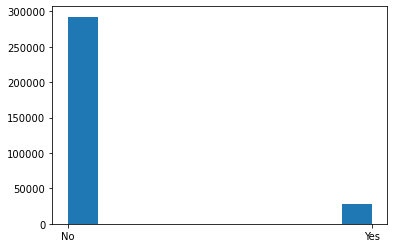

In [28]:
# First look at value partition
print(heart_dataset_preprocessed['HeartDisease'].value_counts())

print("\nPercentages:")
print("No:",
      heart_dataset_preprocessed['HeartDisease'].value_counts()['No']/
      heart_dataset_preprocessed['HeartDisease'].size*100)
print("Yes:",
      heart_dataset_preprocessed['HeartDisease'].value_counts()['Yes']/
      heart_dataset_preprocessed['HeartDisease'].size*100)

# Visualization of partition with histogramm
plt.hist(heart_dataset_preprocessed['HeartDisease'])
plt.show()

**Conclusion: Dataset is very unbalanced**

In [29]:
# HeartDisease column has two distinct values and is the target variable, so we can use the LabelEncoder for preprocessing
label_encoder = preprocessing.LabelEncoder()

print(heart_dataset_preprocessed['HeartDisease'][0:10])

# Encode data
heart_dataset_preprocessed['HeartDisease'] = label_encoder.fit_transform(heart_dataset_preprocessed['HeartDisease'])

heart_dataset_preprocessed['HeartDisease'][0:10]

0     No
1     No
2     No
3     No
4     No
5    Yes
6     No
7     No
8     No
9     No
Name: HeartDisease, dtype: object


0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: HeartDisease, dtype: int64

## Numerical features

In [30]:
# List all numerical features
numerical_features = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

# Print correlation matrix of numerical features
print(heart_dataset_preprocessed.corr())

                HeartDisease       BMI  PhysicalHealth  MentalHealth  \
HeartDisease        1.000000  0.051803        0.170721      0.028591   
BMI                 0.051803  1.000000        0.109788      0.064131   
PhysicalHealth      0.170721  0.109788        1.000000      0.287987   
MentalHealth        0.028591  0.064131        0.287987      1.000000   
SleepTime           0.008327 -0.051822       -0.061387     -0.119717   

                SleepTime  
HeartDisease     0.008327  
BMI             -0.051822  
PhysicalHealth  -0.061387  
MentalHealth    -0.119717  
SleepTime        1.000000  


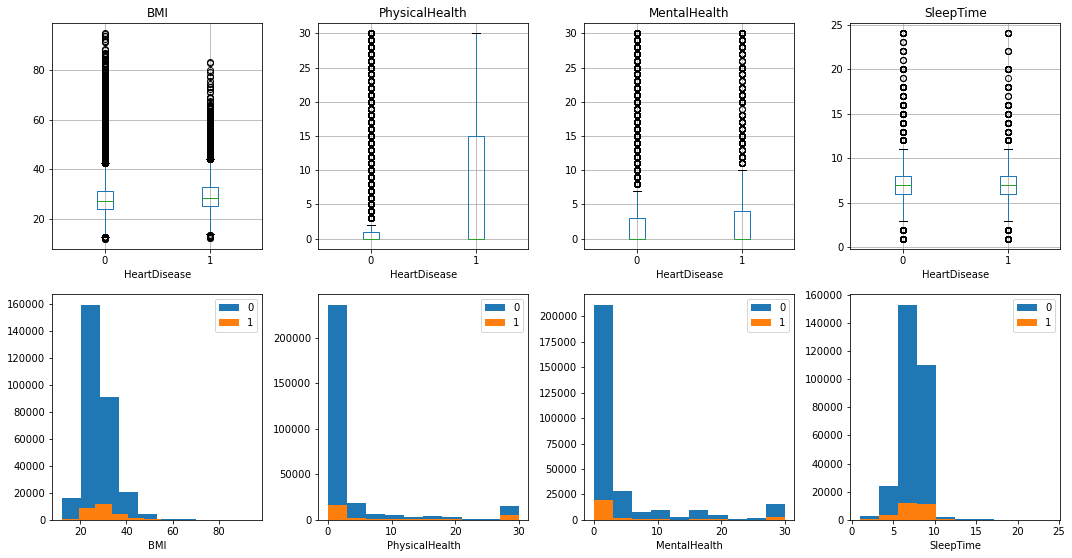

In [31]:
# Plot distribution of numerical features, grouped by class
figure_distribution = plt.figure(figsize=(15, 8))

# Boxplot
figure_index = 1
for current_feature in numerical_features:
    ax = figure_distribution.add_subplot(2, 4, figure_index)
    heart_dataset_preprocessed.boxplot(column=[current_feature], by='HeartDisease', ax=ax)
    figure_index += 1

# Histogram
for current_feature in numerical_features:
    ax = figure_distribution.add_subplot(2, 4, figure_index)
    for has_heart_disease, group in heart_dataset_preprocessed.groupby('HeartDisease'):
        # plot the data points for the current group and feature combination
        ax.hist(group[current_feature], label=has_heart_disease)
        ax.set_xlabel(current_feature)
        ax.legend()
    figure_index += 1

plt.suptitle('')
plt.tight_layout()
plt.show()

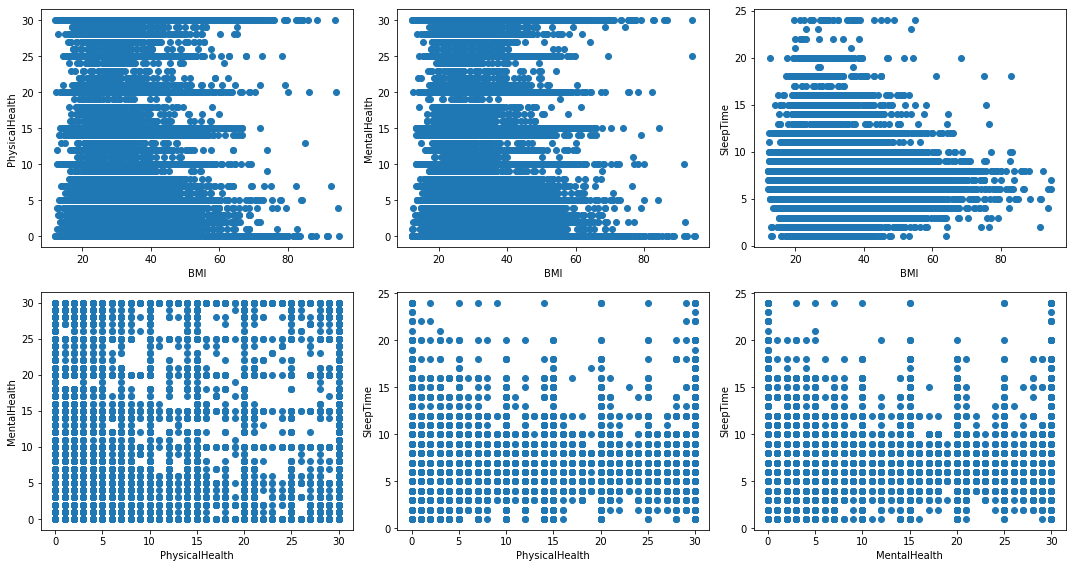

In [32]:
import itertools

# Plot scatters of numerical features
figure_scatter = plt.figure(figsize=(15, 8))
figure_index = 1

# Create all possible combinations of the numerical features
combinations = itertools.combinations(numerical_features, 2)

# Go through all combinations and create one plot for each
for combination in combinations:
    # Add a subplot to the figure
    axs = figure_scatter.add_subplot(2, 3, figure_index)
    axs.scatter(heart_dataset_preprocessed[combination[0]],
                heart_dataset_preprocessed[combination[1]])
    # Set the axis labels of the current subplot
    axs.set_xlabel(combination[0])
    axs.set_ylabel(combination[1])
    # Increase the figure index (otherwise all plots are drawn in the first subplot)
    figure_index += 1

plt.tight_layout()
plt.show()

## None numerical features

Next we need to look whether the features are nominal, ordinal or binary, to choose the right encoder. For this we will look at the unique values of each column and then decide.

In [33]:
none_numerical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                           'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Print unique values of each column
for feature in none_numerical_features:
    print(feature + ":", heart_dataset_preprocessed[feature].unique())

Smoking: ['Yes' 'No']
AlcoholDrinking: ['No' 'Yes']
Stroke: ['No' 'Yes']
DiffWalking: ['No' 'Yes']
Sex: ['Female' 'Male']
AgeCategory: ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race: ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic: ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity: ['Yes' 'No']
GenHealth: ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma: ['Yes' 'No']
KidneyDisease: ['No' 'Yes']
SkinCancer: ['Yes' 'No']


**Conclusion:**

Nominal features: Race

Ordinal features:
- AgeCategory: Age has a natural order from low to high
- GenHealth: Has a natural order from poor to excellent
- Diabetic: Yes is more severe then Yes (during pregnancy) more severe then No, borderline diabetes more severe then Yes

Binary features: Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, PhysicalActivity, Asthma, KidneyDisease, SkinCancer

### Encoding ordinal features
Ordinal features have a specific order so we have to make sure that we encode the features according to that order. For this reason we can't use the sklearn OrdinalEncoder because this encoder uses the alphabetical order which doesn't fit with our features´ order. That's why we will use a dictionary to define our desired order and apply that order to our features with the pandas .map() function. https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24

#### Diabetic (as ordinal feature, ordered by severity)

Diabetic status may be considered ordinal, as the different states express different severity e.g. only temporarily during pregnancy, having almost diabetic may be viewed as less healthy   

In [34]:
# Create dictionary of ordinal to integer mapping
diabetic_order = {'No': 0,
                 'Yes, during pregnancy': 1,
                 'No, borderline diabetes': 2,
                 'Yes': 3}

# Apply using map
heart_dataset_preprocessed['Diabetic'] = heart_dataset_preprocessed['Diabetic'].map(diabetic_order)
heart_dataset_preprocessed['Diabetic']

0         3.0
1         0.0
2         3.0
3         0.0
4         0.0
         ... 
319790    3.0
319791    0.0
319792    0.0
319793    0.0
319794    0.0
Name: Diabetic, Length: 319795, dtype: float64

#### AgeCategory

In [35]:
# Create dictionary of ordinal to integer mapping
age_category_order = {'18-24':1, 
                      '25-29':2, 
                      '30-34':3, 
                      '35-39':4, 
                      '40-44':5, 
                      '45-49':6,
                      '50-54':7,
                      '55-59':8,
                      '60-64':9,
                      '65-69':10,
                      '70-74':11,
                      '75-79':12,
                      '80 or older':13}

# Using the average of age groups is a standard procedure in econmetric literature
# when dealing with age groups (assuming people are getting 110 years old max, but not many 
# so assuming on average 90 years in that age group)
age_category_order = {'18-24': {'avg': 21, 'min': 18, 'max': 24},
                      '25-29': {'avg': 27, 'min': 25, 'max': 29},
                      '30-34': {'avg': 32, 'min': 30, 'max': 34}, 
                     '35-39': {'avg': 37, 'min': 35, 'max': 39},
                      '40-44': {'avg': 42, 'min': 40, 'max': 44},
                      '45-49': {'avg': 47, 'min': 45, 'max': 49}, 
                     '50-54': {'avg': 52, 'min': 50, 'max': 54},
                      '55-59': {'avg': 57, 'min': 55, 'max': 59},
                      '60-64': {'avg': 62, 'min': 60, 'max': 64},
                     '65-69': {'avg': 67, 'min': 65, 'max': 69},
                      '70-74': {'avg': 72, 'min': 70, 'max': 74}, 
                     '75-79': {'avg': 77, 'min': 75, 'max': 79},
                      '80 or older': {'avg': 90, 'min': 80, 'max': 110}}

# Get average of ervery age group
get_avg = lambda x : age_category_order.get(x).get('avg')

# Apply using map or apply
#heart_dataset_preprocessed['AgeCategory'] = heart_dataset_preprocessed['AgeCategory'].map(age_category_order)
heart_dataset_preprocessed['AgeCategoryAvg'] = heart_dataset_preprocessed['AgeCategory'].apply(get_avg)
heart_dataset_preprocessed['AgeCategoryAvg']

0         57
1         90
2         67
3         77
4         42
          ..
319790    62
319791    37
319792    47
319793    27
319794    90
Name: AgeCategoryAvg, Length: 319795, dtype: int64

#### GenHealth

In [36]:
# Create dictionary of ordinal to integer mapping
gen_health_order = {'Poor':1, 
                    'Fair':2, 
                    'Good':3, 
                    'Very good':4, 
                    'Excellent':5}

# Apply using map
heart_dataset_preprocessed['GenHealth'] = heart_dataset_preprocessed['GenHealth'].map(gen_health_order)
heart_dataset_preprocessed['GenHealth']

0         4
1         4
2         2
3         3
4         4
         ..
319790    2
319791    4
319792    3
319793    3
319794    3
Name: GenHealth, Length: 319795, dtype: int64

### Encoding nominal features
Nominal features have no order so we will use a one-hot-encoder for those features.

In [37]:
nominal_features = ['Race']

# Encoding
one_hot_encoder = preprocessing.OneHotEncoder()
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(heart_dataset_preprocessed[nominal_features]).toarray(),
                               columns=one_hot_encoder.get_feature_names(nominal_features))

# TODO maybe drop one Race column and one diabetic column as overspecified if all those are taken into the model

# Joining
heart_dataset_preprocessed = heart_dataset_preprocessed.drop(columns=nominal_features)
heart_dataset_preprocessed = heart_dataset_preprocessed.join(one_hot_encoded)
heart_dataset_preprocessed[one_hot_encoder.get_feature_names(nominal_features)]

/Users/franzi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/franzi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
319790,0.0,0.0,0.0,1.0,0.0,0.0
319791,0.0,0.0,0.0,1.0,0.0,0.0
319792,0.0,0.0,0.0,1.0,0.0,0.0
319793,0.0,0.0,0.0,1.0,0.0,0.0


### Encoding binary features
For binary features we want to encode them with 0 and 1 but we have to make sure that we always use the same number for the same value. For example 1 for yes and 0 for no.

#### Yes/No Features

In [38]:
yes_no_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma',
                   'KidneyDisease', 'SkinCancer']

# Encode yes/no features
for feature in yes_no_features:
    heart_dataset_preprocessed[feature] = heart_dataset_preprocessed[feature].replace({'Yes':1, 'No':0})
    
heart_dataset_preprocessed[yes_no_features]

,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,1,0,0,0,1,1,0,1
1,0,0,1,0,1,0,0,0
2,1,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
319790,1,0,0,1,0,1,0,0
319791,1,0,0,0,1,1,0,0
319792,0,0,0,0,1,0,0,0
319793,0,0,0,0,0,0,0,0


#### Sex

In [39]:
# Encode Sex feature
heart_dataset_preprocessed['Sex'] = heart_dataset_preprocessed['Sex'].replace({'Female':1, 'Male':0})
heart_dataset_preprocessed['Sex']

0         1
1         1
2         0
3         1
4         1
         ..
319790    0
319791    0
319792    1
319793    1
319794    1
Name: Sex, Length: 319795, dtype: int64

In [40]:
display(heart_dataset_preprocessed.head())

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Asthma,KidneyDisease,SkinCancer,AgeCategoryAvg,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,...,1,0,1,57,0.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,...,0,0,0,90,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,...,1,0,0,67,0.0,0.0,0.0,0.0,0.0,1.0
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,...,0,0,1,77,0.0,0.0,0.0,0.0,0.0,1.0
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,...,0,0,0,42,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
print(heart_dataset_preprocessed.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'AgeCategoryAvg',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White'],
      dtype='object')


In [42]:
# Normalization of the features

# Concatenate numerical features and ordinal features for normalization
features = numerical_features.copy()
features.extend(['AgeCategoryAvg', 'Diabetic', 'GenHealth'])

# Use MinMaxScaler to normalize numerical data, as some of the data isn't normally distributed
scaler = preprocessing.MinMaxScaler()
heart_dataset_preprocessed[features] = scaler.fit_transform(heart_dataset_preprocessed[features])

# quick overview of normalized features
heart_dataset_preprocessed[features].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategoryAvg,Diabetic,GenHealth
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,317236.000000,319795.000000
mean,0.196854,0.112390,0.129946,0.265090,0.494363,0.142867,0.648757
std,0.076737,0.265028,0.265175,0.062435,0.274878,0.343084,0.260730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.144996,0.000000,0.000000,0.217391,0.304348,0.000000,0.500000
50%,0.184957,0.000000,0.000000,0.260870,0.521739,0.000000,0.750000
75%,0.234215,0.066667,0.100000,0.304348,0.666667,0.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
heart_viz_df = heart_dataset_preprocessed.copy()

# Visualization

For every column a histogram is printed having each state of having a heart disease as a separate color

<AxesSubplot:xlabel='BMI', ylabel='Count'>

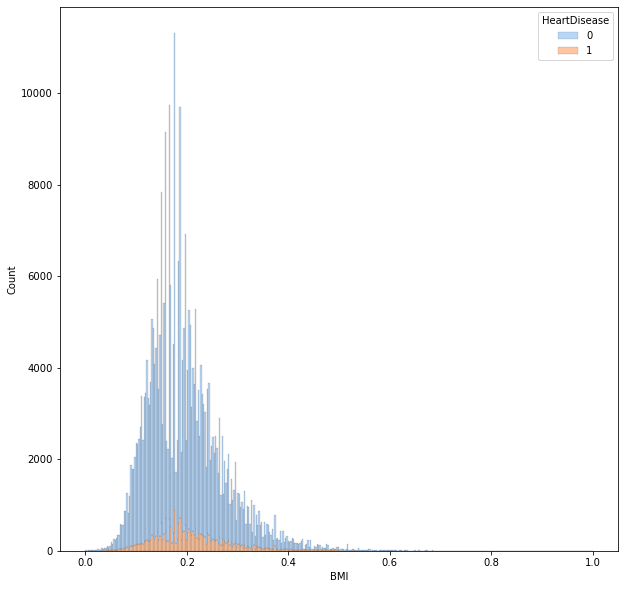

In [44]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

columns_to_plot = ["BMI", "Smoking"]


f, ax = plt.subplots(figsize=(10, 10))

sns.histplot(
    heart_viz_df,
    x="BMI", hue="HeartDisease",
    multiple="stack",
    palette="pastel",
    linewidth=.10,
)

For every pair there is a pairplot generated 